In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Cust = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\mousami Datascience class\Machine learning\Clustering\Mall_Customers.csv')
Cust.head()
Cust.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [3]:
Cust_1 = Cust[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']]

In [18]:
Cust_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int32
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 5.6 KB


In [19]:
Cust_1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
Encode = LabelEncoder()

In [22]:
Encoded_gender = Encode.fit_transform(Cust_1.iloc[:,0])

In [8]:
print(Encoded_gender)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


In [9]:
Cust_1['Gender'] = Encoded_gender

C:\Users\abhis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
Cust_1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [11]:
from sklearn.cluster import KMeans

In [12]:
Cust_1.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [13]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return(x)

In [15]:
#Cust_2 = norm_func(Cust_1)
#Cust_2.head()

In [44]:
model = KMeans(n_clusters=5,n_init=8,random_state=110)

In [16]:
from sklearn.cluster import KMeans

In [44]:
X = Cust_1[['Annual Income (k$)','Spending Score (1-100)']].values
X.shape

(200, 2)

In [45]:
# Create an empty list
Z = []

In [46]:
# Calculate the number of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', n_init=10,max_iter=300,random_state=None)
    kmeans.fit(X)
    Z.append(kmeans.inertia_)

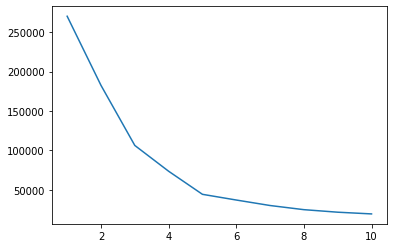

In [47]:
plt.plot(range(1,11),Z)

In [48]:
# from the above elbow plot we see a downward gradient from 3 to 5. Choosing the number of cluster to be 5. 

In [50]:
kmeans = KMeans(n_clusters=5,init='k-means++', n_init=10,max_iter=300,random_state=None)

In [53]:
a = kmeans.fit_predict(X)

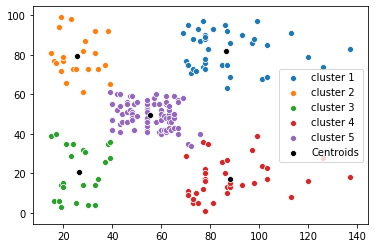

In [67]:
# Visualize the cluster using scatterplot

sns.scatterplot(X[a==0,0],X[a==0,1],label='cluster 1')
sns.scatterplot(X[a==1,0],X[a==1,1],label='cluster 2')
sns.scatterplot(X[a==2,0],X[a==2,1],label='cluster 3')
sns.scatterplot(X[a==3,0],X[a==3,1],label='cluster 4')
sns.scatterplot(X[a==4,0],X[a==4,1],label='cluster 5')
# create the centroids.
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label='Centroids',color='black')